# 6-4 Visualizations

- plotly express
- Programming Challenge



## Plotly Express

Plotly Express is a high-level interface for creating beautiful and meaningful visualizations. Plotly Express is easy to use and allows you to create a wide variety of visualizations with just a few lines of code.

[https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/)

Difference between seaborn and plotly express:

- Unlike seaborn, plotly express does not aggregate data. It is up to you to aggregate the data before passing it to plotly express.

- Plotly express is built on top of plotly.js, a JavaScript library for creating interactive visualizations. This means that plotly express visualizations are interactive by default.

- Plotly express can draw maps, too.


<Axes: xlabel='species', ylabel='count'>

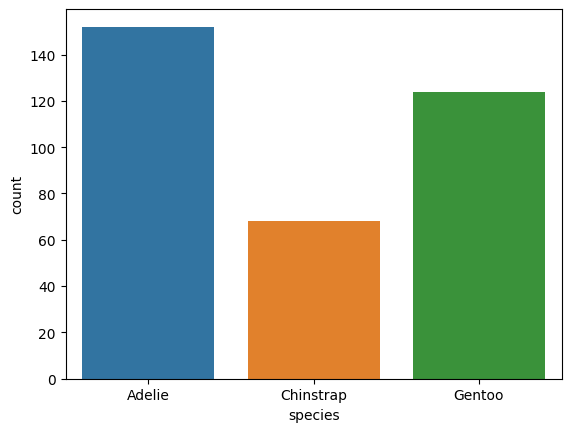

In [1]:
# Here's the seaborn code from 6-1
import seaborn as sns
pengo = sns.load_dataset("penguins")
pengo['count'] = 1

sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")

In [3]:
# here's the plotly express equivalent
import plotly.express as px
fig = px.bar(pengo, x="species", y="count", color="species", barmode="group")
fig

### Notice the difference

- You can hover, zoom and take a screenshot of the plotly express visualizations.
- `barmode=group` is used to group the bars in a bar chart. so when you hover over the bars, you can see the values of each bar.


### Plotly Express In Streamlit

- use `st.plotly_chart()` to display plotly express visualizations in streamlit.
- pass in the figure as the first argument to `st.plotly_chart(fig)`.


`6-4-st-plotly-express.py`

```python

import streamlit as st
import plotly.express as px
import pandas as pd
import seaborn as sns
pengo = sns.load_dataset("penguins")
pengo['count'] = 1

st.title('Plotly Express Example')
fig = px.bar(pengo, x="species", y="count", color="species", barmode="group")
st.plotly_chart(fig) # this displays the plotly express visualization in streamlit

```

### Summarizing Data for Plotly Express

Depending on your data, you may need to summarize it prior to plotting it with plotly express. For example, if you have a dataset with multiple rows for each observation, you may need to aggregate the data before passing it to plotly express.

this can be accomplished with a `df.groupby()` or `pd.pivot_table()`

`6-4-st-plotly-express-summary.py`




## Lots of examples

The rest is up to your! Some examples to follow

Here: [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/)


In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")

# text_auto=True shows the count of observations in each bin
fig = px.density_heatmap(tips, x="total_bill", y="tip", text_auto=True)
fig.show()


In [5]:
import pandas as pd
import random
stlucia_df = pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/refs/heads/master/st-lucia/parishes.csv")
stlucia_df['Amount'] = stlucia_df.apply(lambda row: random.randint(50,500), axis=1)

# Saint Lucia Parishes - Scatter
fig = px.scatter_mapbox(stlucia_df,  lat="Lat", lon="Lng", zoom=10, color = 'Parish', hover_name = 'Parish', size = 'Amount',  mapbox_style="open-street-map")
fig.show()

# Saint Lucia Parishes - Density
fig = px.density_mapbox(stlucia_df, lat='Lat', lon='Lng', z='Amount', radius=10, center=dict(lat=13.9, lon=-60.97), zoom=10, mapbox_style="open-street-map")
fig.show()